In [9]:
import numpy as np
from get_periodic_orbits import make_broucke_path, plot_orbit, plot_orbit_and_approx, Broucke
from torus_rep import get_irreps, construct_orbit, plot_results, reorder_dataset, get_params_for_TorusRep

The code below uses matrices $A, B \in \mathbb{C}^{d\times d}$ as well as vectors $x_0 \in \mathbb{C}^d$ and $\omega \in \mathbb{Z}^m$ with $m \leq d$ to construct the orbit 
$$
x(t) = A \begin{bmatrix} 
e^{2\pi i \omega_1 t} & & & & & \\
& \ddots & & & & \\
& & e^{2\pi i \omega_m t} & & & \\
& & & 1 & & \\
& & & & \ddots & \\
& & & & & 1
\end{bmatrix} B \cdot x_0.
$$
Here, $A, B,$ and $\omega$ are chosen such that $x(t)$ will approximate the dataset.

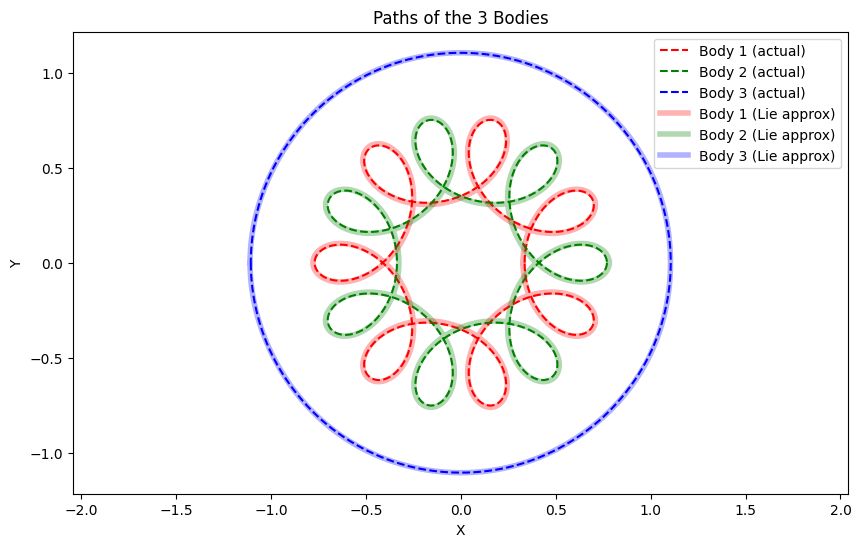

In [10]:
title = 'A2'
X = make_broucke_path(title)
X = X.T
X, weights, t = reorder_dataset(X, verbose=False)
irreps_dict = get_irreps(x=X, t=t, get_vectors=True)
A, B, omega = get_params_for_TorusRep(irreps_dict) # These are used implicitly in construct_orbit
x0 = X[:, 0].astype(np.complex128)
x_approx = construct_orbit(irreps_dict, x0, num_points=X.shape[1]).real
# plot_results(X, x_approx, projection='pca')
plot_orbit_and_approx(X.T, x_approx.T)

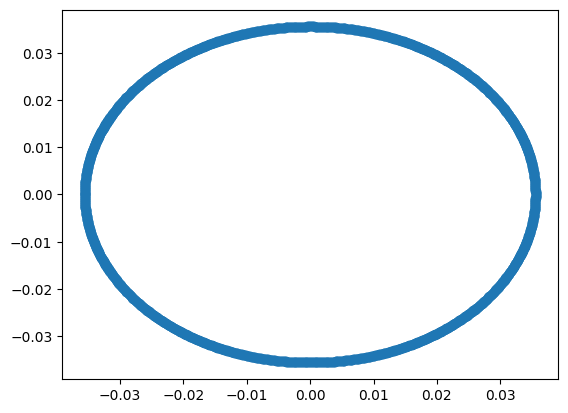

In [ ]:
def test_epsilon(title, epsilon):
    X = make_broucke_path(title)
    X = X.T
    X, weights, t = reorder_dataset(X, plot_evecs=True, epsilon=epsilon)
    P = get_irreps(x=X, t=t,plot_norms=False, log_scale=True)
    # x_start = X[:, 0]
    # x_approx = construct_orbit(P, x_start, num_points=X.shape[1]).real
    # plot_results(X, x_approx, projection='pca')
    # plot_orbit_and_approx(X.T, x_approx.T)
test_epsilon('A3', 1e-2)